In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
import os

In [4]:
housing_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [5]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#print the dimension/shape of the dataframe
housing_df.shape

(1460, 81)

In [7]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
#removing the ID column
housing_df.drop("Id",axis = 1 ,inplace = True)

<Axes: >

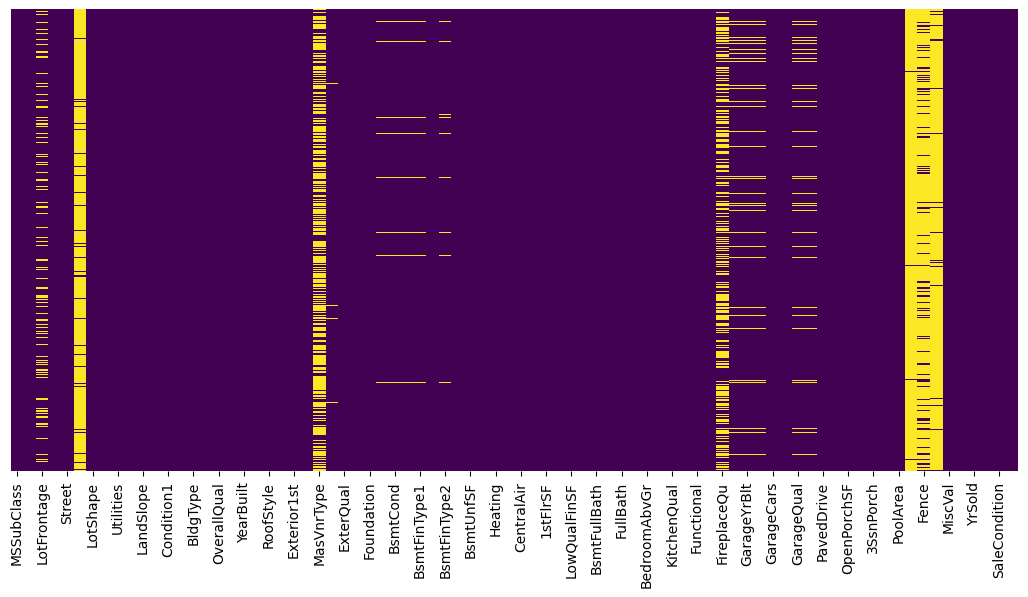

In [9]:
plt.figure(figsize=(13,6))
sns.heatmap(housing_df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [10]:
housing_df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [11]:
null_df = housing_df.isnull().sum()*100/len(housing_df)

In [12]:
null_df

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64

In [13]:
#print columns that have values > 25%
#this shows the less influential variables 
null_df[null_df.values > 25].index

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [14]:
housing_df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis =1,
               inplace = True)

In [15]:
null_df[(null_df.values <= 25) & (null_df.values > 0)]

LotFrontage     17.739726
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [16]:
housing_df['LotFrontage'].median()

69.0

In [17]:
#since there are still quite a bit of missing vaues in lotfrontage 
#we can fill it in with the median value 

housing_df['LotFrontage'].fillna(69.0,inplace = True)

In [18]:
#returning location where msvnrarea is null as a data frame but for only
#MasVnrArea','MasVnrType columns

housing_df.loc[housing_df.MasVnrArea.isnull(),['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [19]:
housing_df[['MasVnrArea','MasVnrType']].head()

,MasVnrArea,MasVnrType
0,196.0,BrkFace
1,0.0,NaN
2,162.0,BrkFace
3,0.0,NaN
4,350.0,BrkFace


In [20]:
#now that we know where the area is null the type is also null
#fill in the values 
housing_df.MasVnrArea.fillna(0,inplace = True)
housing_df.MasVnrType.fillna('None', inplace = True)

In [21]:
housing_df[['GarageYrBlt','GarageFinish','GarageQual','GarageCond']]

,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,2003.0,RFn,TA,TA
1,1976.0,RFn,TA,TA
2,2001.0,RFn,TA,TA
3,1998.0,Unf,TA,TA
4,2000.0,RFn,TA,TA
...,...,...,...,...
1455,1999.0,RFn,TA,TA
1456,1978.0,Unf,TA,TA
1457,1941.0,RFn,TA,TA
1458,1950.0,Unf,TA,TA


In [22]:
housing_df.loc[housing_df.GarageType.isnull(),['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN
1407,NaN,NaN,NaN,NaN,NaN
1449,NaN,NaN,NaN,NaN,NaN
1450,NaN,NaN,NaN,NaN,NaN


Considering that the garage is empty for these houses 

In [23]:
housing_df.GarageType.fillna('None', inplace=True)
housing_df.GarageYrBlt.fillna(0, inplace=True)
housing_df.GarageFinish.fillna('None', inplace=True)
housing_df.GarageQual.fillna('None', inplace=True)
housing_df.GarageCond.fillna('None', inplace=True)

In [24]:
#removing all rows with Na, NaN , null values
housing_df.dropna(inplace = True)

In [25]:
#check if there are any na values left 
#should return an empty series 
null_df = housing_df.isnull().sum()
null_df[null_df.values > 0]

Series([], dtype: int64)

<Axes: >

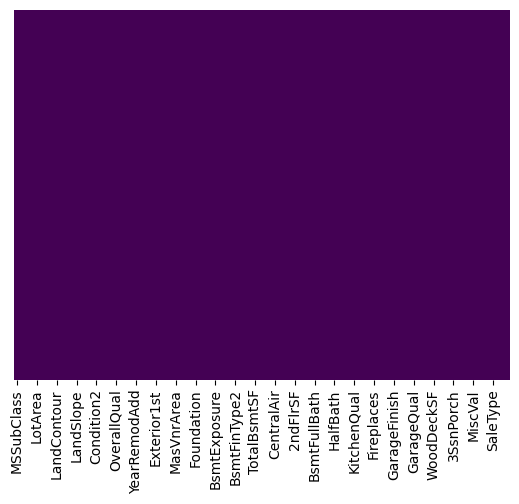

In [26]:
sns.heatmap(housing_df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [27]:
#we can ask for a statistical summary of each column and specify
#the percentile
#Adding .T allows us to view the columns as rows and vice versa 
housing_df.describe([0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1]).T


,count,mean,std,min,0%,1%,5%,10%,25%,50%,75%,90%,95%,99%,100%,max
MSSubClass,1420.0,56.799296,42.268545,20.0,20.0,20.00,20.00,20.0,20.00,50.0,70.00,120.0,160.00,190.00,190.0,190.0
LotFrontage,1420.0,69.952817,22.276497,21.0,21.0,21.00,35.00,48.0,60.00,69.0,79.00,92.0,105.00,137.81,313.0,313.0
LotArea,1420.0,10546.640845,10104.687606,1300.0,1300.0,1680.00,3228.30,4992.8,7583.00,9500.0,11628.50,14442.8,17426.85,38609.24,215245.0,215245.0
OverallQual,1420.0,6.145070,1.359361,1.0,1.0,3.00,4.00,5.0,5.00,6.0,7.00,8.0,8.00,10.00,10.0,10.0
OverallCond,1420.0,5.591549,1.110238,1.0,1.0,3.00,4.00,5.0,5.00,5.0,6.00,7.0,8.00,9.00,9.0,9.0
YearBuilt,1420.0,1971.582394,30.378484,1872.0,1872.0,1898.38,1916.00,1924.0,1954.00,1973.5,2001.00,2006.0,2007.00,2009.00,2010.0,2010.0
YearRemodAdd,1420.0,1985.281690,20.454376,1950.0,1950.0,1950.00,1950.00,1950.0,1968.00,1994.0,2004.00,2007.0,2007.00,2009.00,2010.0,2010.0
MasVnrArea,1420.0,104.773239,181.996947,0.0,0.0,0.00,0.00,0.0,0.00,0.0,168.00,336.0,456.00,794.48,1600.0,1600.0
BsmtFinSF1,1420.0,455.345070,456.088615,0.0,0.0,0.00,0.00,0.0,0.00,400.0,725.00,1074.4,1274.15,1572.81,5644.0,5644.0
BsmtFinSF2,1420.0,47.523239,162.988333,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,123.2,400.55,837.58,1474.0,1474.0


### To remove outliers which are +-3 standard deviations away from the mean you would have to get rid of anything above the 99 percentile since we only have positive values 

In [28]:
#excluded object datatypes and printed, assigned a list of non- object
#columns
number_cols = housing_df.select_dtypes(exclude= 'object').columns
number_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [29]:
np.percentile(housing_df['MSSubClass'],99)

190.0

### In order to exclude anything higher than 99% of each int/float column then what we have to do is change the value to be the 99%tile value using a for loop 

In [30]:
type(number_cols)

pandas.core.indexes.base.Index

In [31]:
num_cols = list(number_cols)

### since the variable above is an index not a list to iterate through we have to convert it to a list when we are calling the for loop

In [32]:
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [33]:
for i in num_cols:
    housing_df.loc[housing_df[i] >= np.percentile(housing_df[i], 99),i] = np.percentile(housing_df[i], 99)
    

In [34]:
housing_df[num_cols].describe([0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1]).T

,count,mean,std,min,0%,1%,5%,10%,25%,50%,75%,90%,95%,99%,100%,max
MSSubClass,1420.0,56.799296,42.268545,20.0,20.0,20.00,20.00,20.0,20.00,50.0,70.00,120.0,160.00,190.0000,190.00,190.00
LotFrontage,1420.0,69.541655,19.804766,21.0,21.0,21.00,35.00,48.0,60.00,69.0,79.00,92.0,105.00,137.6561,137.81,137.81
LotArea,1420.0,10090.120141,5164.705843,1300.0,1300.0,1680.00,3228.30,4992.8,7583.00,9500.0,11628.50,14442.8,17426.85,38208.4844,38609.24,38609.24
OverallQual,1420.0,6.145070,1.359361,1.0,1.0,3.00,4.00,5.0,5.00,6.0,7.00,8.0,8.00,10.0000,10.00,10.00
OverallCond,1420.0,5.591549,1.110238,1.0,1.0,3.00,4.00,5.0,5.00,5.0,6.00,7.0,8.00,9.0000,9.00,9.00
YearBuilt,1420.0,1971.581690,30.377604,1872.0,1872.0,1898.38,1916.00,1924.0,1954.00,1973.5,2001.00,2006.0,2007.00,2009.0000,2009.00,2009.00
YearRemodAdd,1420.0,1985.277465,20.449368,1950.0,1950.0,1950.00,1950.00,1950.0,1968.00,1994.0,2004.00,2007.0,2007.00,2009.0000,2009.00,2009.00
MasVnrArea,1420.0,102.233239,168.872664,0.0,0.0,0.00,0.00,0.0,0.00,0.0,168.00,336.0,456.00,793.2488,794.48,794.48
BsmtFinSF1,1420.0,450.095880,428.405742,0.0,0.0,0.00,0.00,0.0,0.00,400.0,725.00,1074.4,1274.15,1572.6561,1572.81,1572.81
BsmtFinSF2,1420.0,45.394155,150.113930,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,123.2,400.55,834.8098,837.58,837.58


- We can now see that the 99%, 100%tile and max are all the same eliminating the oultiers 

- Also pool area has zero as the mean so lets get rid of it 

In [35]:
housing_df.drop('PoolArea',axis = 1, inplace = True)
num_cols = housing_df.select_dtypes(exclude='object').columns
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')

In [36]:
#categorical columns 

cat_cols = housing_df.select_dtypes(include='object').columns
cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [37]:
#here we want to print out the value count in eah categorical column

# normalize used to get the percentage 
for i in list(cat_cols):
    print(housing_df[i].value_counts(normalize=True))
    print('**********************************')
    

MSZoning
RL         0.785915
RM         0.150704
FV         0.045775
RH         0.010563
C (all)    0.007042
Name: proportion, dtype: float64
**********************************
Street
Pave    0.995775
Grvl    0.004225
Name: proportion, dtype: float64
**********************************
LotShape
Reg    0.628169
IR1    0.336620
IR2    0.028169
IR3    0.007042
Name: proportion, dtype: float64
**********************************
LandContour
Lvl    0.897887
Bnk    0.042958
HLS    0.035211
Low    0.023944
Name: proportion, dtype: float64
**********************************
Utilities
AllPub    0.999296
NoSeWa    0.000704
Name: proportion, dtype: float64
**********************************
LotConfig
Inside     0.719014
Corner     0.180986
CulDSac    0.064789
FR2        0.032394
FR3        0.002817
Name: proportion, dtype: float64
**********************************
LandSlope
Gtl    0.945775
Mod    0.045070
Sev    0.009155
Name: proportion, dtype: float64
**********************************
Neighborh

Look through the value count and if you see maybe two categories or few where theres big disparity 
delete that because it wont have a big influence on price 

In [38]:
drop_cols = ['Street','Utilities','LandSlope','Condition2','RoofMatl','Heating','CentralAir','Electrical','Functional',
             'PavedDrive','GarageCond','GarageQual','LandContour']

In [39]:
housing_df.drop(columns=drop_cols, inplace=True)

In [40]:
cat_cols = housing_df.select_dtypes(include='object').columns

In [41]:
cat_cols

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'GarageType', 'GarageFinish', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [42]:
housing_df.MSZoning = housing_df.MSZoning.apply(lambda x: 'other' if x not in ('RL','RM') else x)
housing_df.LotShape = housing_df.LotShape.apply(lambda x: 'other' if x not in ('Reg','IR1') else x)
housing_df.LotConfig = housing_df.LotConfig.apply(lambda x: 'other' if x not in ('Inside','Corner') else x)
housing_df.Condition1 = housing_df.Condition1.apply(lambda x: 'other' if x not in ('Norm') else x)
housing_df.BldgType = housing_df.BldgType.apply(lambda x: 'other' if x not in ('1Fam') else x)
housing_df.HouseStyle = housing_df.HouseStyle.apply(lambda x: 'other' if x not in ('1Story','2Story','1.5Fin') else x)
housing_df.RoofStyle = housing_df.RoofStyle.apply(lambda x: 'other' if x not in ('Gable','Hip','1.5Fin') else x)
housing_df.RoofStyle = housing_df.RoofStyle.apply(lambda x: 'other' if x not in ('Gable','Hip','1.5Fin') else x)
housing_df.RoofStyle = housing_df.RoofStyle.apply(lambda x: 'other' if x not in ('Gable','Hip','1.5Fin') else x)
housing_df.Exterior1st = housing_df.Exterior1st.apply(lambda x: 'other' if x not in ('VinylSd','HdBoard','MetalSd','Wd Sdng') else x)
housing_df.Exterior2nd = housing_df.Exterior2nd.apply(lambda x: 'other' if x not in ('VinylSd','HdBoard','MetalSd','Wd Sdng') else x)
housing_df.MasVnrType = housing_df.MasVnrType.apply(lambda x: 'other' if x not in ('None','none','BrkFace') else x)
housing_df.ExterQual = housing_df.ExterQual.apply(lambda x: 'other' if x not in ('TA','Gd') else x)
housing_df.ExterCond = housing_df.ExterCond.apply(lambda x: 'other' if x not in ('TA','Gd') else x)
housing_df.Foundation = housing_df.Foundation.apply(lambda x: 'other' if x not in ('PConc','CBlock','BrkTil') else x)
housing_df.BsmtQual = housing_df.BsmtQual.apply(lambda x: 'other' if x not in ('TA','Gd') else x)
housing_df.BsmtQual = housing_df.BsmtQual.apply(lambda x: 'other' if x not in ('TA','Gd') else x)
housing_df.BsmtExposure = housing_df.BsmtExposure.apply(lambda x: 'other' if x not in ('No','Av') else x)
housing_df.BsmtFinType1 = housing_df.BsmtFinType1.apply(lambda x: 'other' if x not in ('Unf','GLQ','ALQ','BLQ') else x)
housing_df.BsmtFinType2 = housing_df.BsmtFinType2.apply(lambda x: 'other' if x not in ('Unf') else x)
housing_df.HeatingQC = housing_df.HeatingQC.apply(lambda x: 'other' if x not in ('Ex','TA') else x)
housing_df.KitchenQual = housing_df.KitchenQual.apply(lambda x: 'other' if x not in ('TA','Gd') else x)
housing_df.GarageType = housing_df.GarageType.apply(lambda x: 'other' if x not in ('Attchd','Detchd') else x)
housing_df.GarageType = housing_df.GarageType.apply(lambda x: 'other' if x not in ('Attchd','Detchd') else x)
housing_df.SaleType = housing_df.SaleType.apply(lambda x: 'other' if x not in ('WD') else x)
housing_df.SaleCondition = housing_df.SaleCondition.apply(lambda x: 'other' if x not in ('Normal') else x)

In [43]:
def year_to_cat(x):
    if x==0:
        return 'None'
    elif x < 1930:
        return 'lt_1930'
    elif x > 1930 and x <= 1960:
        return 'btw_30_60'
    elif x > 1960 and x <= 1990:
        return 'btw_60_90'
    elif x > 1990:
        return 'gt_90'


In [44]:
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].apply(lambda x: year_to_cat(x))

In [45]:
cat_cols = housing_df.select_dtypes(include='object').columns
num_cols = housing_df.select_dtypes(exclude='object').columns

In [46]:
cat_cols

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [47]:
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')

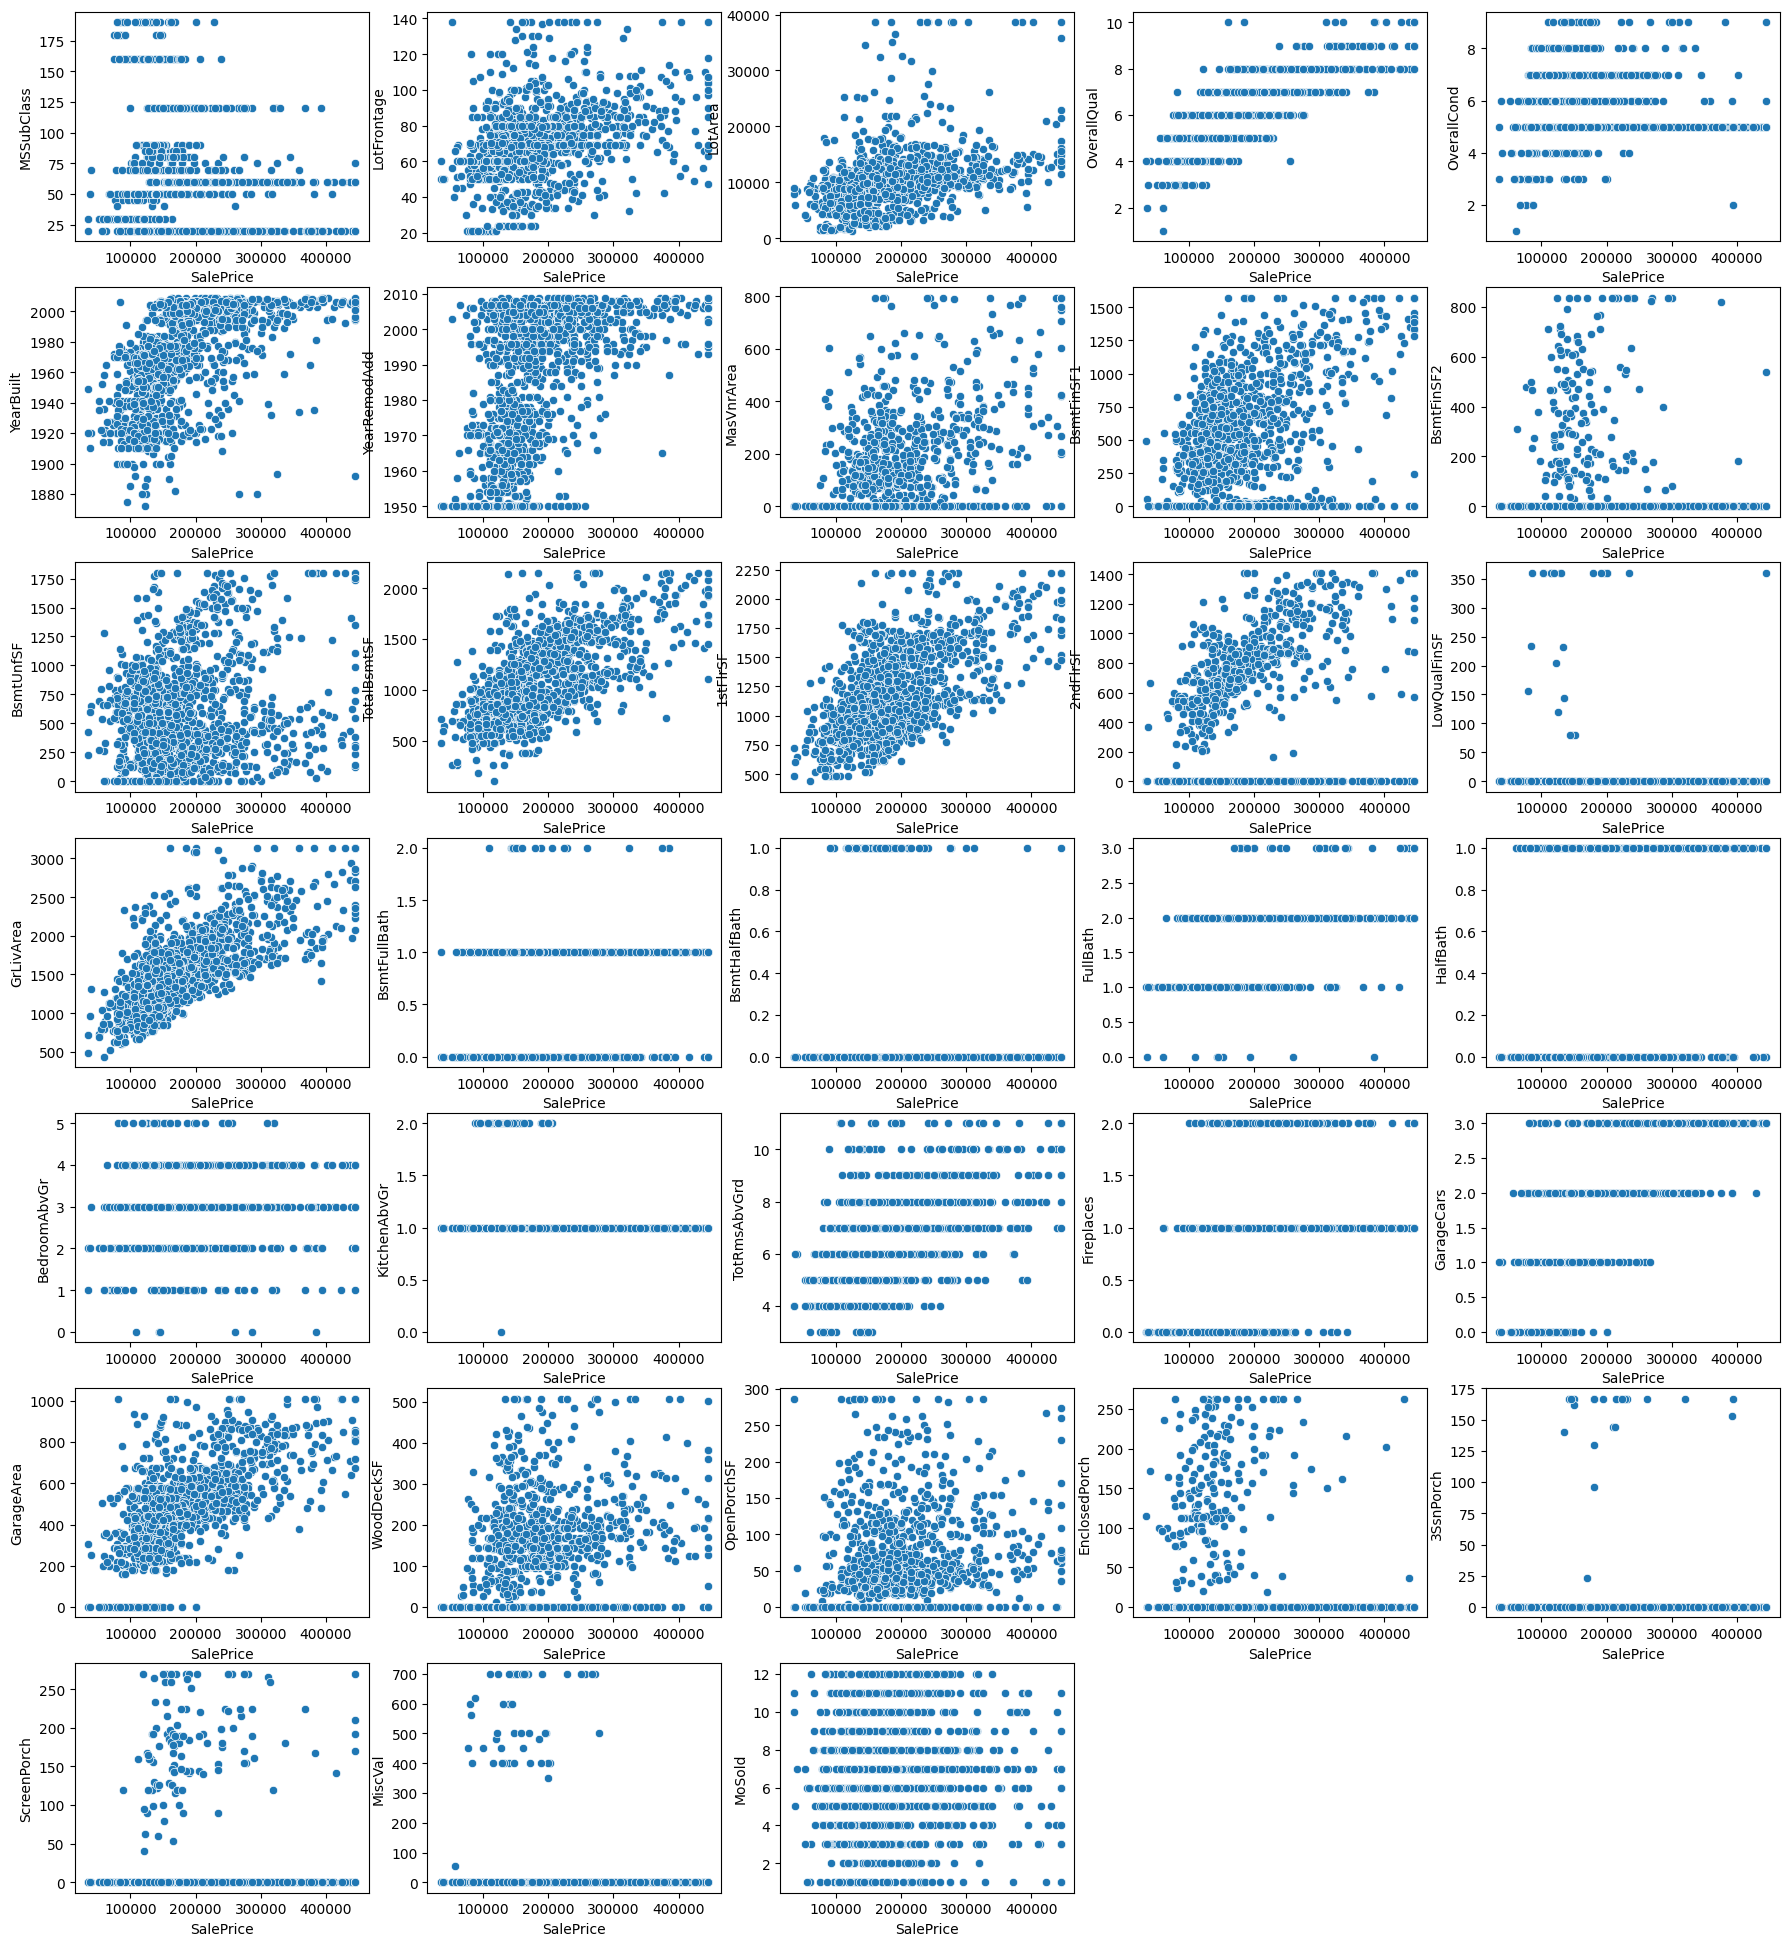

In [109]:
plt.figure(figsize=(22,28))
for i,j in zip(num_cols[:-1], range(len(num_cols[:-1]))):
    plt.subplot(8,5,j+1)
    sns.scatterplot(data=housing_df, x='SalePrice', y=i)

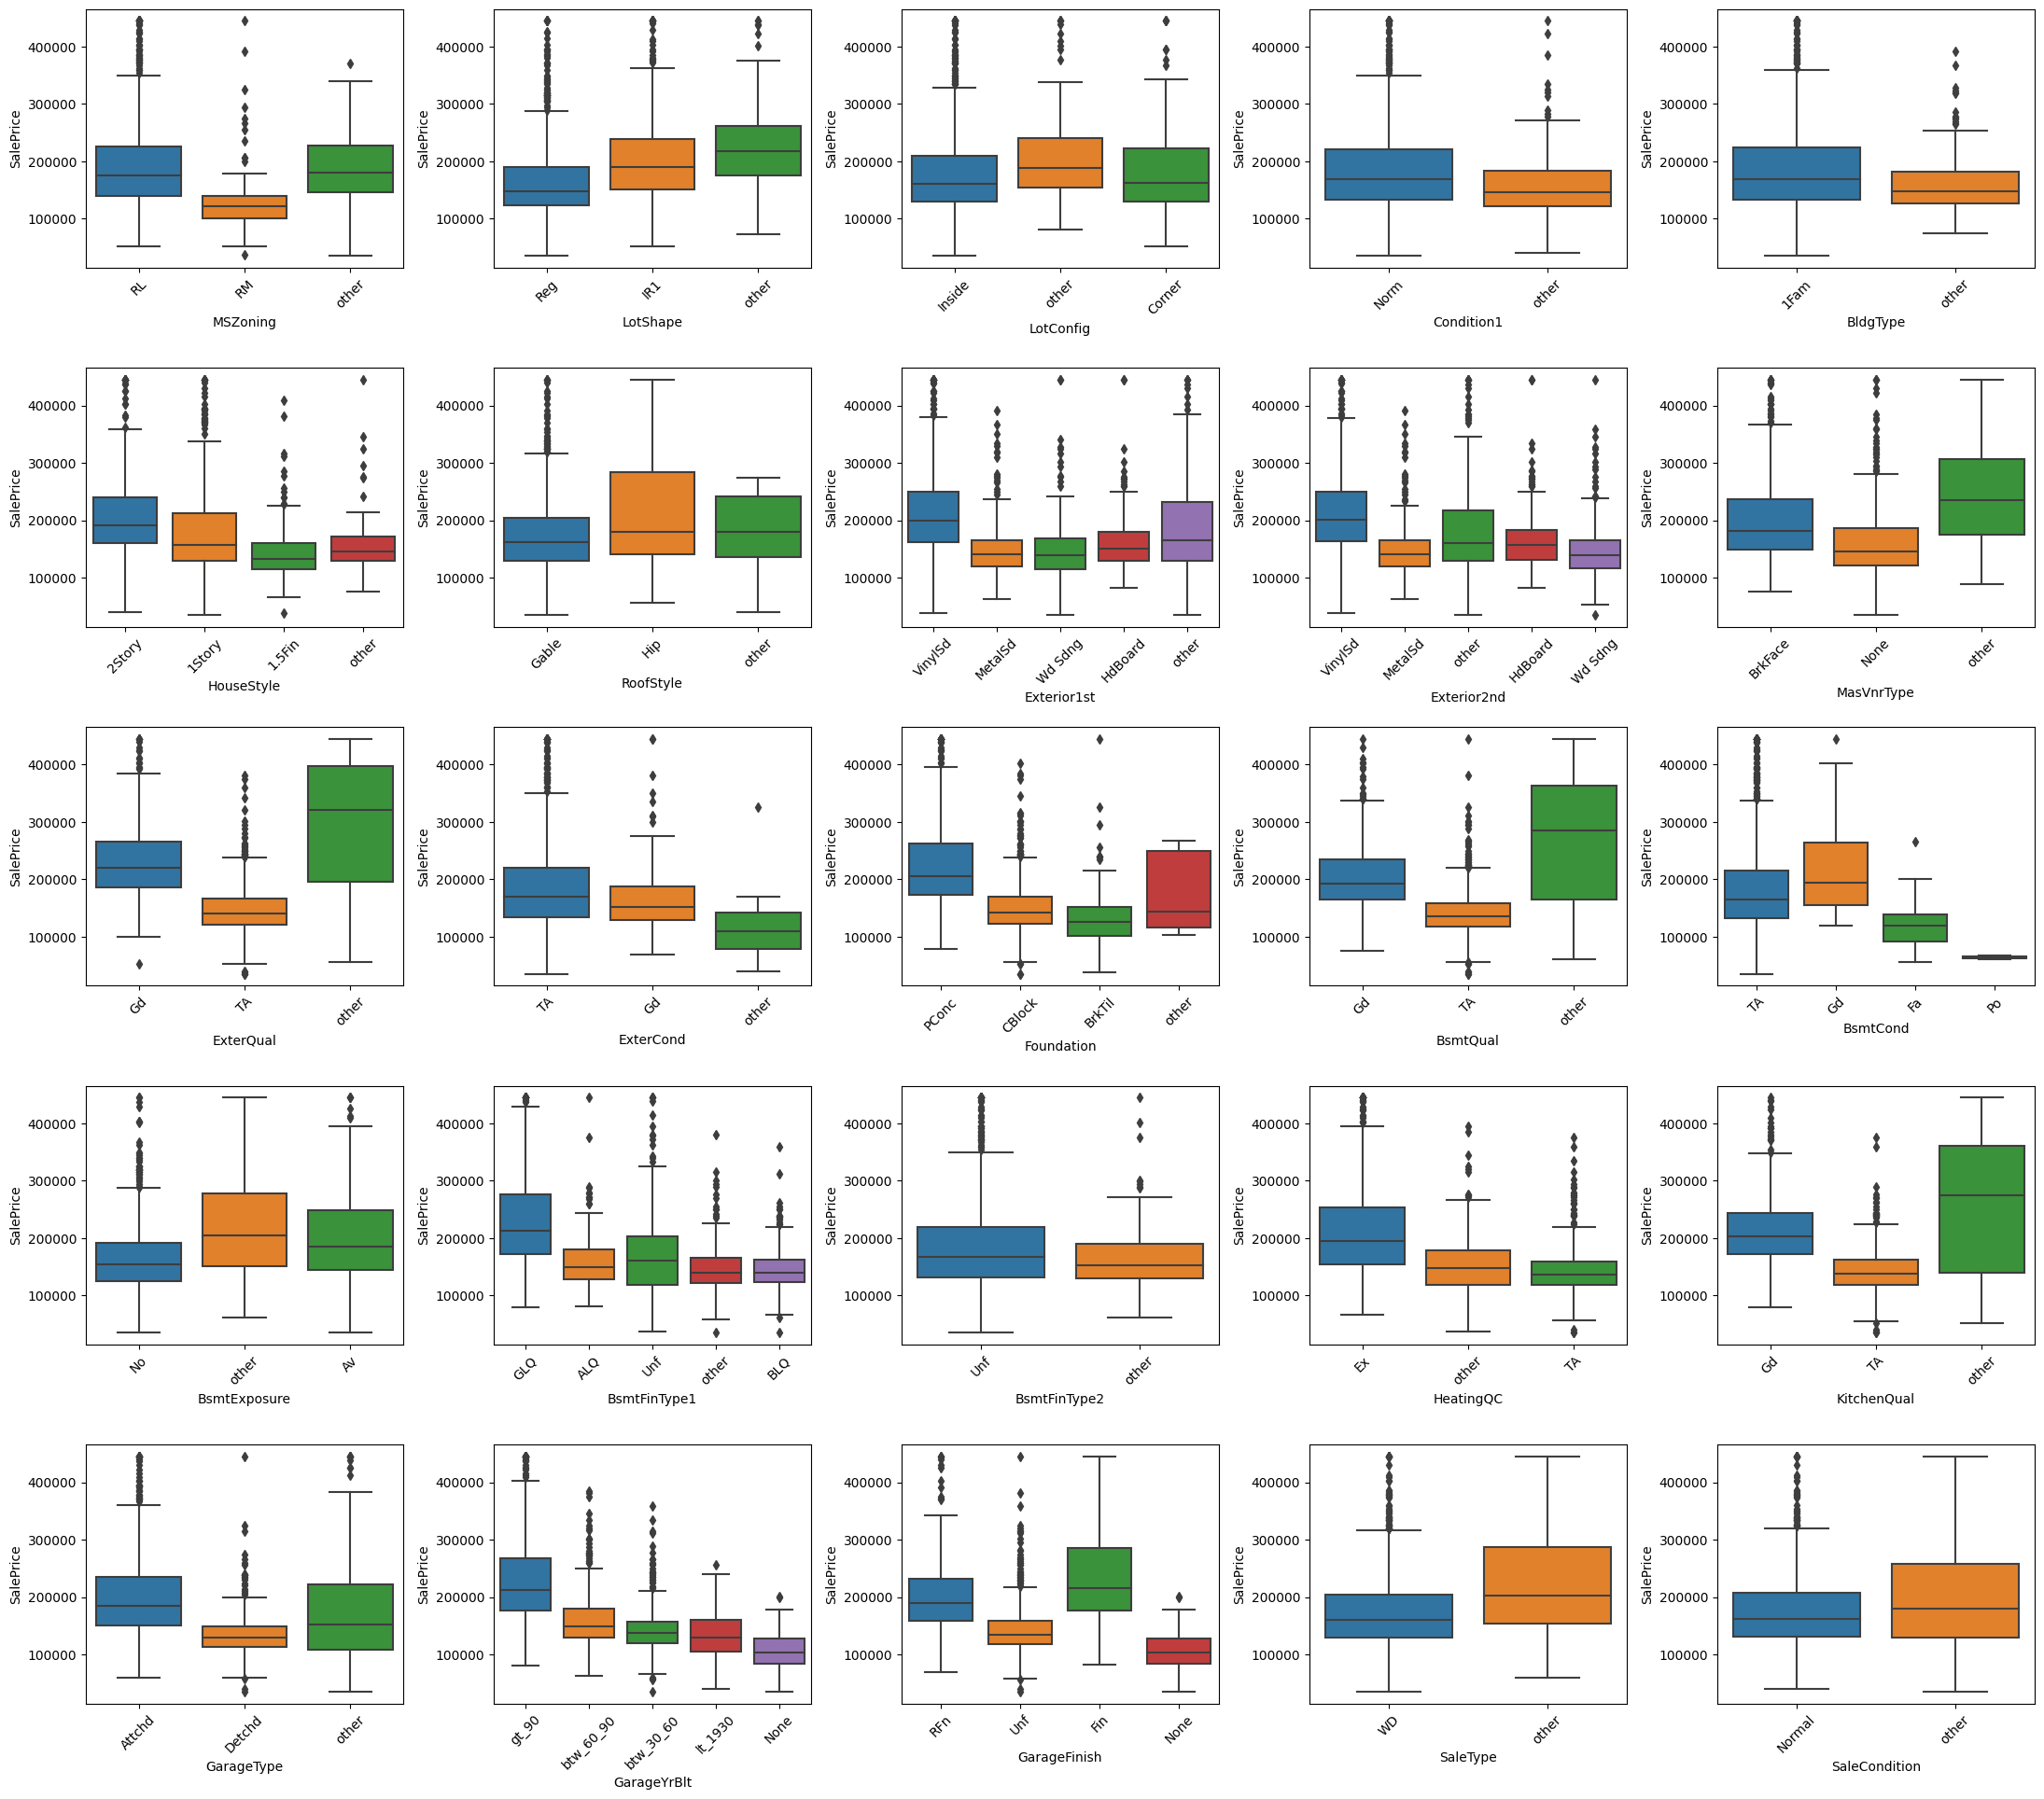

In [107]:
plt.figure(figsize=(22,30))
for i,j in zip(cat_cols, range(len(cat_cols))):
    plt.subplot(8,5,j+1)
    plt.xticks(rotation=45)
    sns.boxplot(data=housing_df, y='SalePrice', x=i)
plt.tight_layout()

<Axes: >

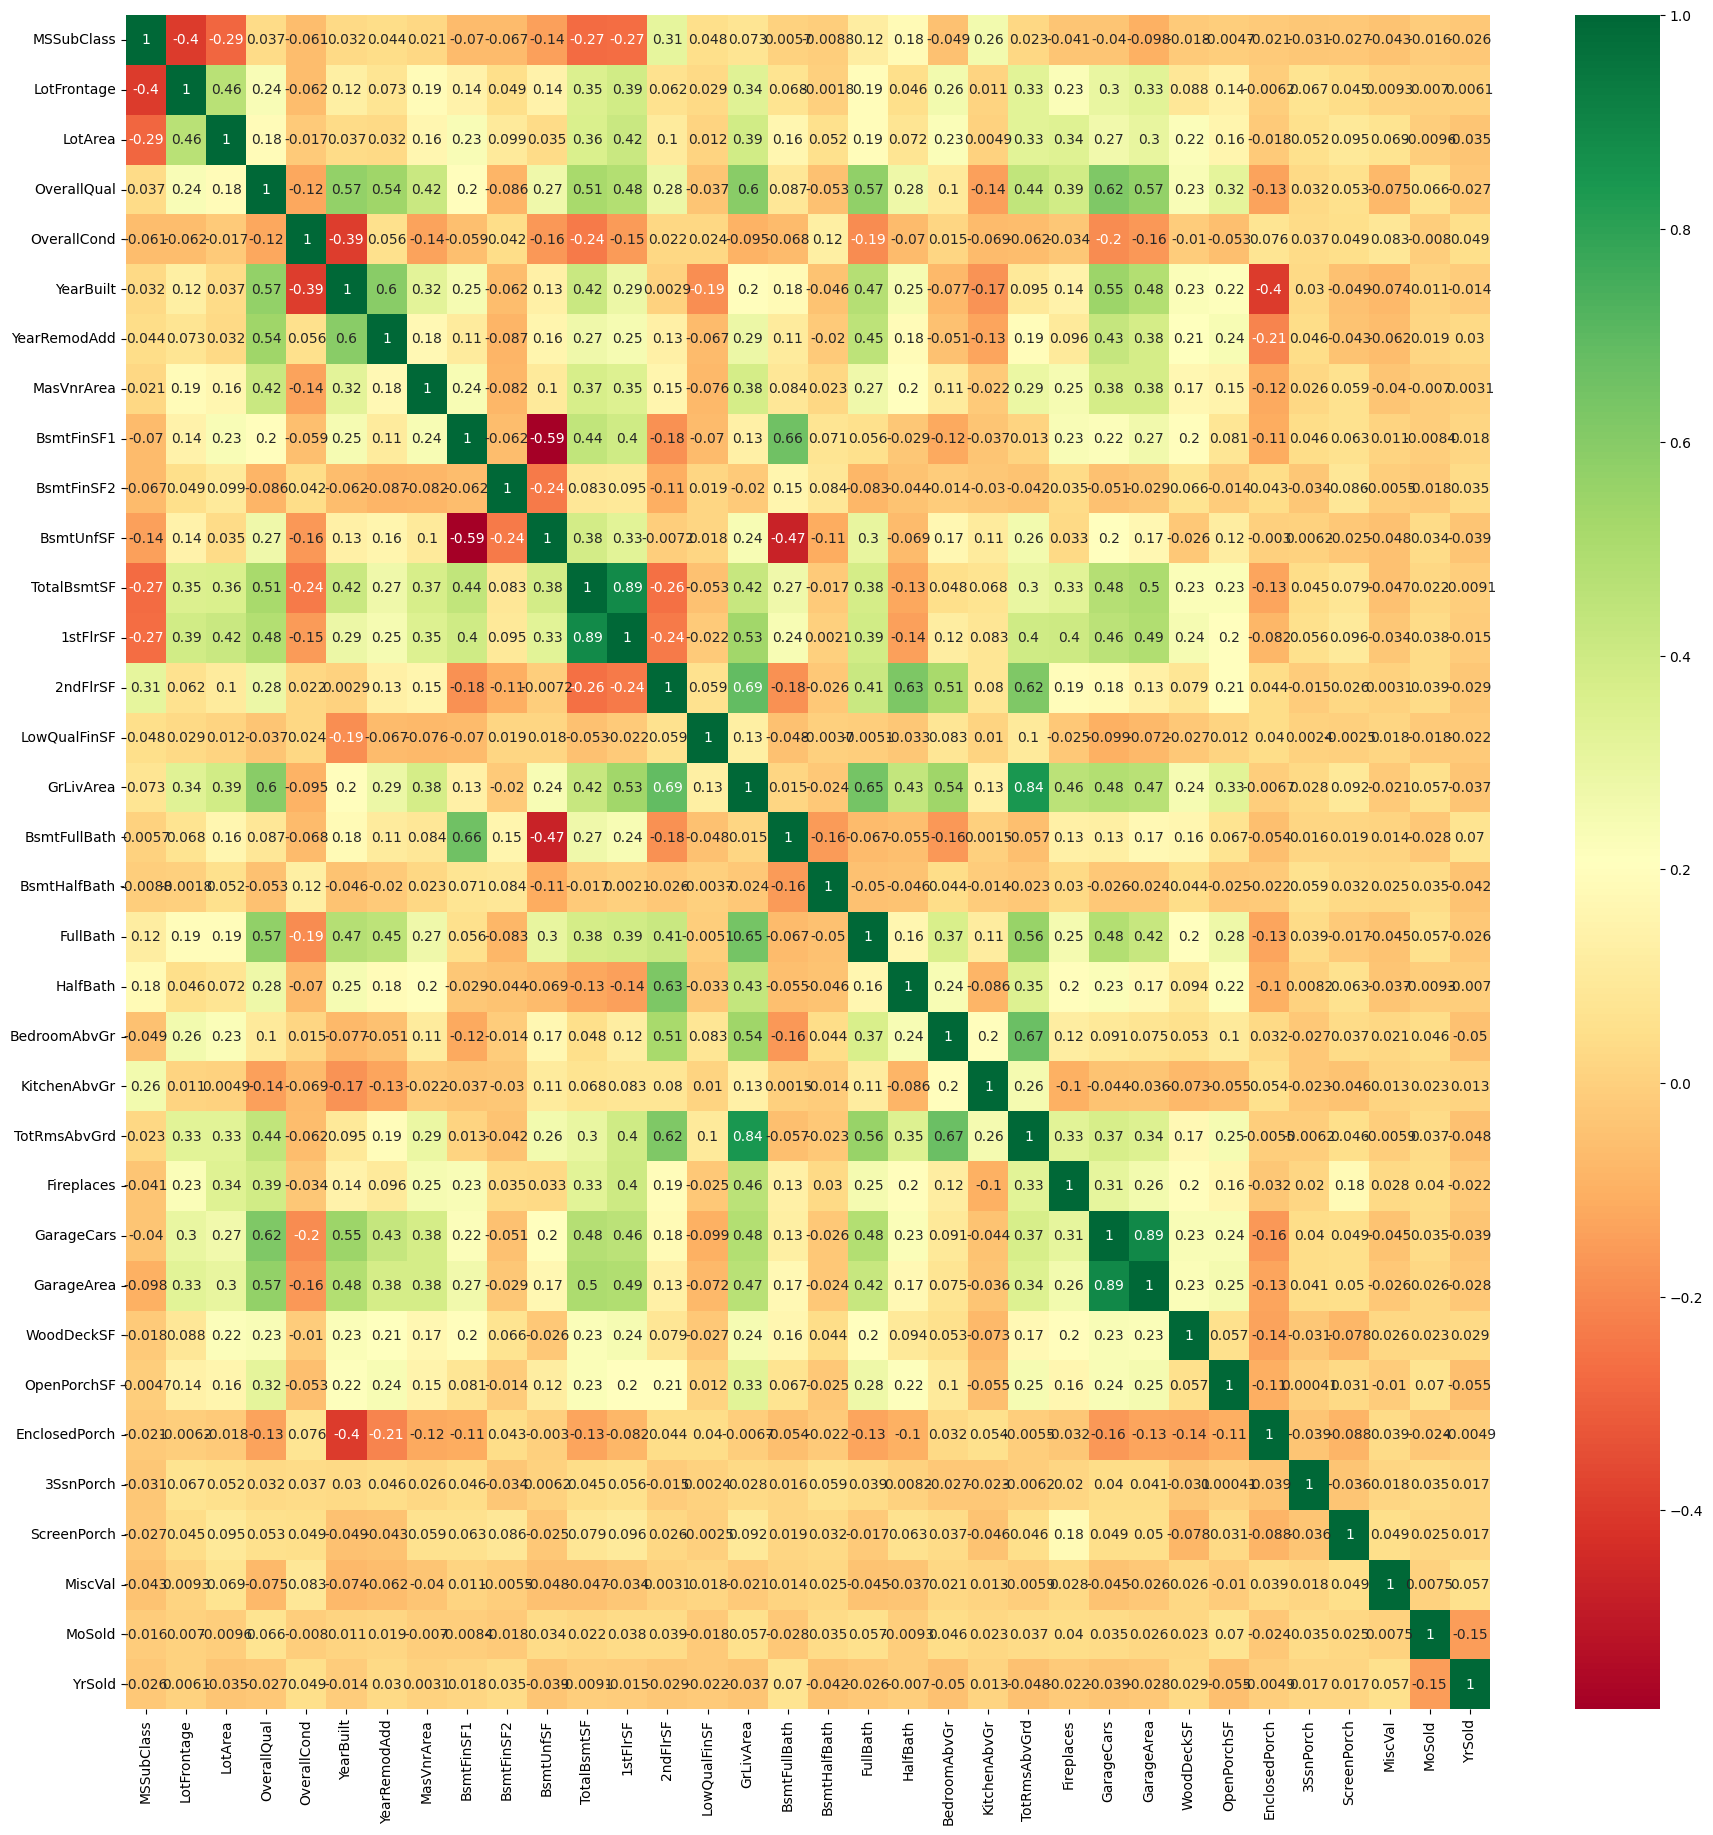

In [110]:
plt.figure(figsize=(22,22))
sns.heatmap(housing_df[num_cols].corr(),cmap='RdYlGn',annot=True)

In [51]:
housing_df.drop(columns='Neighborhood',inplace=True)
housing_df.reset_index(drop=True,inplace=True)

In [52]:
cat_cols = housing_df.select_dtypes(include='object').columns

In [53]:
print(num_cols,cat_cols)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object') Index(['MSZoning', 'LotShape', 'LotConfig', 'Condition1', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'SaleType',
       'SaleCondition'],
      dtype='object')


In [54]:
#lets create a new data frame with only dummmy categorical data and num columns 

dummies_df = housing_df[num_cols]

for i in cat_cols:
    temp = pd.get_dummies(housing_df[i],drop_first=True)
    dummies_df = pd.concat([dummies_df,temp],axis=1)

dummies_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,other,btw_30_60,btw_60_90,gt_90,lt_1930,None,RFn,Unf,other,other
0,60,65.0,8450.0,7,5,2003,2003,196.0,706.0,0.0,...,False,False,False,True,False,False,True,False,False,False
1,20,80.0,9600.0,6,8,1976,1976,0.0,978.0,0.0,...,False,False,True,False,False,False,True,False,False,False
2,60,68.0,11250.0,7,5,2001,2002,162.0,486.0,0.0,...,False,False,False,True,False,False,True,False,False,False
3,70,60.0,9550.0,7,5,1915,1970,0.0,216.0,0.0,...,False,False,False,True,False,False,False,True,False,True
4,60,84.0,14260.0,8,5,2000,2000,350.0,655.0,0.0,...,False,False,False,True,False,False,True,False,False,False


In [55]:
dummies_df.shape

(1420, 92)

## Lets split our data , Train our linear model , predict house sales and Evaluate model

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X = dummies_df.drop(columns='SalePrice')

In [58]:
y = dummies_df['SalePrice']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lm = LinearRegression()

In [62]:
lm.fit(X_train,y_train)

LinearRegression()

In [63]:
#PREDICTIONS 
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

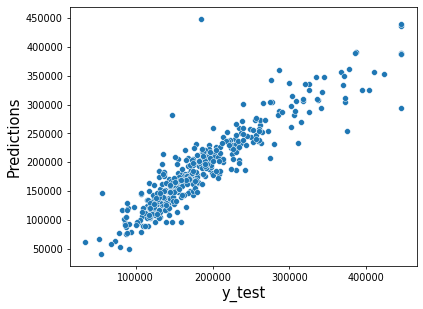

In [64]:
plt.figure(dpi=70)
g=sns.scatterplot(x=y_test,y=predictions)
g.set_xlabel('y_test',fontdict={'size':15})
g.set_ylabel('Predictions',fontdict={'size':15})

/Users/obinnadinneya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


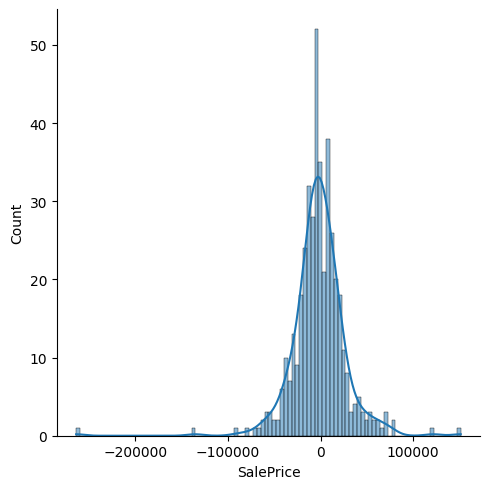

In [65]:
sns.displot(y_test-predictions,bins=100,kde=True,)

In [66]:
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test,predictions)

MSE = metrics.mean_squared_error(y_test,predictions)

RMSE = np.sqrt(MSE)

R2 = metrics.r2_score(y_test,predictions)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print(f'R^2: {R2}')

MAE: 19252.91620307908
MSE: 877221390.2127147
RMSE: 29617.92346219962
R^2: 0.8408386586699157


Average Saleprice = $182000

In [67]:
cdf = pd.DataFrame(data=lm.coef_,index=X.columns,columns=['Coefficients'])

In [68]:
cdf

,Coefficients
MSSubClass,32.043316
LotFrontage,-85.282548
LotArea,0.709214
OverallQual,10270.092687
OverallCond,7345.520653
...,...
None,-2492.790736
RFn,-1923.756048
Unf,-475.088697
other,9100.029610


In [69]:
dummies_df.shape

(1420, 92)

In [70]:
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Condition1,BldgType,HouseStyle,OverallQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Reg,Inside,Norm,1Fam,2Story,7,...,61.0,0.00,0.0,0.0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600.0,Reg,other,other,1Fam,1Story,6,...,0.0,0.00,0.0,0.0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250.0,IR1,Inside,Norm,1Fam,2Story,7,...,42.0,0.00,0.0,0.0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550.0,IR1,Corner,Norm,1Fam,2Story,7,...,35.0,263.05,0.0,0.0,0,2,2006,WD,other,140000.0
4,60,RL,84.0,14260.0,IR1,other,Norm,1Fam,2Story,8,...,84.0,0.00,0.0,0.0,0,12,2008,WD,Normal,250000.0


In [71]:
num_cols = num_cols.drop('SalePrice')

In [72]:
#try some PCA PRINCIPLE CONCEPT 
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()

In [74]:
scaler.fit(housing_df[num_cols])

StandardScaler()

In [75]:
scaled_numdata = scaler.transform(housing_df[num_cols])

In [76]:
scaled_numdata

array([[ 0.07574975, -0.2294021 , -0.317675  , ..., -0.18262048,
        -1.59623017,  0.14339689],
       [-0.87091383,  0.52825816, -0.09493141, ..., -0.18262048,
        -0.48964912, -0.61076451],
       [ 0.07574975, -0.07787005,  0.22465723, ..., -0.18262048,
         0.98579227,  0.14339689],
       ...,
       [ 0.31241565, -0.17889141, -0.20301048, ...,  6.65601563,
        -0.48964912,  1.65171968],
       [-0.87091383, -0.07787005, -0.07226967, ..., -0.18262048,
        -0.85850947,  1.65171968],
       [-0.87091383,  0.27570474, -0.02965785, ..., -0.18262048,
        -0.12078878,  0.14339689]])

In [77]:
#Apply PCA to numcols scaled data 
from sklearn.decomposition import PCA

In [78]:
pca = PCA(n_components=2)

In [79]:
pca.fit(scaled_numdata)

PCA(n_components=2)

In [80]:
num_pca = pca.transform(scaled_numdata)

In [81]:
num_pca

array([[ 1.13385017,  0.74860809],
       [-0.01957875, -1.30148757],
       [ 1.41790869,  0.59223138],
       ...,
       [ 0.82895729,  2.96460449],
       [-2.74793587, -2.11774013],
       [-1.0307581 , -1.57955408]])

In [82]:
num_pca.shape

(1420, 2)

In [83]:
pd.DataFrame(pca.components_,columns=num_cols)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold
0,-0.030559,0.173964,0.174924,0.300011,-0.086846,0.221118,0.193447,0.200674,0.118831,-0.016935,...,0.291533,0.282019,0.134198,0.154986,-0.075752,0.020348,0.03290,-0.019152,0.023657,-0.015318
1,0.186600,-0.045040,-0.054025,-0.009391,0.055864,-0.160052,-0.052740,-0.035932,-0.328502,-0.085210,...,-0.074061,-0.106211,-0.075571,0.041225,0.094534,-0.032381,-0.01219,0.003833,0.025381,-0.040191


In [84]:
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold',
       'YrSold'],
      dtype='object')

In [85]:
dummies_df2 = pd.DataFrame(num_pca,columns=['component1','component2'])

for i in cat_cols:
    temp = pd.get_dummies(housing_df[i],drop_first=True)
    dummies_df2 = pd.concat([dummies_df2,temp],axis=1)

dummies_df2.head()

,component1,component2,RM,other,Reg,other,Inside,other,other,other,...,other,btw_30_60,btw_60_90,gt_90,lt_1930,None,RFn,Unf,other,other
0,1.133850,0.748608,False,False,True,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,-0.019579,-1.301488,False,False,True,False,False,True,True,False,...,False,False,True,False,False,False,True,False,False,False
2,1.417909,0.592231,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
3,-0.588490,1.137523,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
4,4.488697,1.142559,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False


In [86]:
X = dummies_df2
y = dummies_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [87]:
lmodel2 = LinearRegression()

In [88]:
lmodel2.fit(X_train,y_train)

LinearRegression()

In [89]:
pca_predictions = lmodel2.predict(X_test)

Text(0, 0.5, 'pca_predictions')

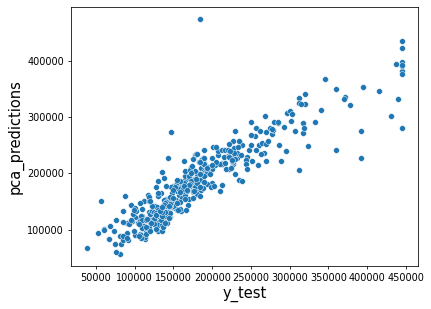

In [90]:
plt.figure(dpi=70)
g=sns.scatterplot(x=y_test,y=pca_predictions)
g.set_xlabel('y_test',fontdict={'size':15})
g.set_ylabel('pca_predictions',fontdict={'size':15})

/Users/obinnadinneya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(0.0, 50.0)

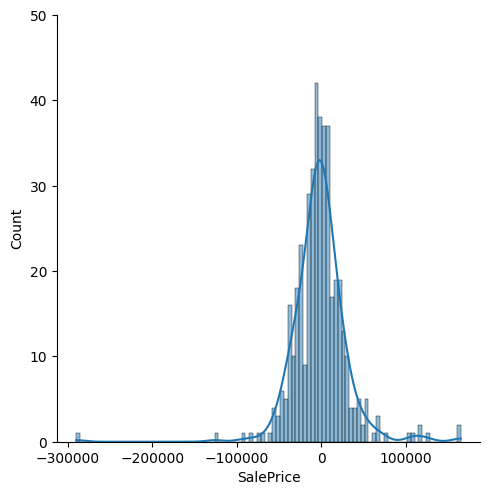

In [91]:
#DISTRIBUTION GRAPH OF RESIDUALS 
sns.displot(y_test-pca_predictions,bins=100,kde=True)
plt.ylim(0.0,50.0)

In [92]:
MAE = metrics.mean_absolute_error(y_test,pca_predictions)

MSE = metrics.mean_squared_error(y_test,pca_predictions)

RMSE = np.sqrt(MSE)

R2 = metrics.r2_score(y_test,pca_predictions)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print(f'R^2: {R2}')

MAE: 21289.882512202243
MSE: 1106032778.5723412
RMSE: 33257.0711063428
R^2: 0.8146752261958337


#### Using Principle component analysis to compress our numerical columns to two components.This improved our model slightly reducing error and rsquared values.

In [93]:
len(X_test)

426

### USING NEURAL NETWORKS TO PREDICT PRICE

In [94]:
X = dummies_df.drop(columns='SalePrice')
y = dummies_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=101)
    

In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [96]:
#fit scaler to training data
#calcualtes the parameters needed for scaling , hence calculating std dev, min and max 
#we do it to training set only to avoid data leakage.
scaler.fit(X_train)

MinMaxScaler()

In [97]:
#transform training data and test data 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### A commonly used "rule of thumb" for deep neural networks is the "sandwich rule.

In [99]:
model = Sequential()
#layers in neural network 3 hidden layers
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
#output layer one nueron bacoause of what we are trying to predict
#no activation function because we want to predict price
model.add(Dense(1))

In [100]:
#optimize the models gradient descent using the optimizer argument for example the ADAM
model.compile(optimizer='rmsprop',loss='mae')

In [101]:
model.fit(X_train,y=y_train,epochs=400,verbose=1)

Epoch 1/400
32/32 [==============================] - 0s 664us/step - loss: 180791.1562
Epoch 2/400
32/32 [==============================] - 0s 608us/step - loss: 180789.9531
Epoch 3/400
32/32 [==============================] - 0s 574us/step - loss: 180788.2188
Epoch 4/400
32/32 [==============================] - 0s 545us/step - loss: 180785.6875
Epoch 5/400
32/32 [==============================] - 0s 536us/step - loss: 180782.3281
Epoch 6/400
32/32 [==============================] - 0s 535us/step - loss: 180777.7344
Epoch 7/400
32/32 [==============================] - 0s 534us/step - loss: 180771.7500
Epoch 8/400
32/32 [==============================] - 0s 503us/step - loss: 180764.1094
Epoch 9/400
32/32 [==============================] - 0s 548us/step - loss: 180754.3906
Epoch 10/400
32/32 [==============================] - 0s 550us/step - loss: 180742.3438
Epoch 11/400
32/32 [==============================] - 0s 573us/step - loss: 180727.5625
Epoch 12/400
32/32 [=====================

32/32 [==============================] - 0s 516us/step - loss: 27032.7754
Epoch 188/400
32/32 [==============================] - 0s 508us/step - loss: 26936.5195
Epoch 189/400
32/32 [==============================] - 0s 505us/step - loss: 26843.1523
Epoch 190/400
32/32 [==============================] - 0s 507us/step - loss: 26732.3848
Epoch 191/400
32/32 [==============================] - 0s 515us/step - loss: 26650.2734
Epoch 192/400
32/32 [==============================] - 0s 507us/step - loss: 26548.8184
Epoch 193/400
32/32 [==============================] - 0s 511us/step - loss: 26457.2148
Epoch 194/400
32/32 [==============================] - 0s 496us/step - loss: 26363.4766
Epoch 195/400
32/32 [==============================] - 0s 519us/step - loss: 26274.6543
Epoch 196/400
32/32 [==============================] - 0s 517us/step - loss: 26180.2559
Epoch 197/400
32/32 [==============================] - 0s 522us/step - loss: 26100.7734
Epoch 198/400
32/32 [=========================

32/32 [==============================] - 0s 509us/step - loss: 19676.7559
Epoch 374/400
32/32 [==============================] - 0s 516us/step - loss: 19645.5449
Epoch 375/400
32/32 [==============================] - 0s 515us/step - loss: 19677.0566
Epoch 376/400
32/32 [==============================] - 0s 507us/step - loss: 19652.3711
Epoch 377/400
32/32 [==============================] - 0s 517us/step - loss: 19625.6836
Epoch 378/400
32/32 [==============================] - 0s 511us/step - loss: 19621.2598
Epoch 379/400
32/32 [==============================] - 0s 512us/step - loss: 19590.7227
Epoch 380/400
32/32 [==============================] - 0s 498us/step - loss: 19608.4766
Epoch 381/400
32/32 [==============================] - 0s 508us/step - loss: 19594.1738
Epoch 382/400
32/32 [==============================] - 0s 509us/step - loss: 19568.0352
Epoch 383/400
32/32 [==============================] - 0s 504us/step - loss: 19559.6680
Epoch 384/400
32/32 [=========================

<Axes: >

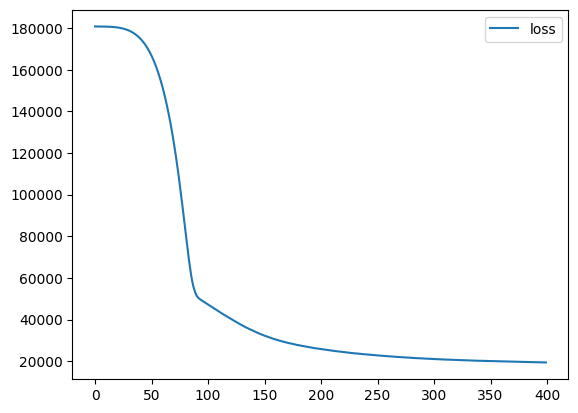

In [102]:
loss_df = pd.DataFrame(model.history.history)
#to determine the amount of epochs needed for the minimum amount of loss
loss_df.plot()

In [103]:
#returns the models loss based on the test set
#we used mean squared error
model.evaluate(X_test,y_test, verbose=0)

21209.869140625

In [104]:
#loss on the training set 
model.evaluate(X_train,y_train, verbose=0)

19337.08203125

In [113]:
test_predictions = model.predict(X_test)

14/14 [==============================] - 0s 703us/step


In [114]:
test_predictions

array([[137447.81 ],
       [ 93754.1  ],
       [202205.28 ],
       [134218.45 ],
       [125896.14 ],
       [139232.95 ],
       [123963.99 ],
       [138534.56 ],
       [216550.14 ],
       [192392.   ],
       [237330.12 ],
       [238432.88 ],
       [185324.31 ],
       [147508.97 ],
       [211095.8  ],
       [183616.42 ],
       [147146.22 ],
       [146792.84 ],
       [149014.17 ],
       [147617.61 ],
       [161993.28 ],
       [162456.94 ],
       [115413.35 ],
       [177984.16 ],
       [184738.52 ],
       [ 99831.68 ],
       [233095.12 ],
       [147897.28 ],
       [177541.56 ],
       [145108.27 ],
       [133026.56 ],
       [184655.89 ],
       [203137.67 ],
       [310498.7  ],
       [151275.19 ],
       [216066.38 ],
       [122113.18 ],
       [165095.9  ],
       [171253.69 ],
       [216472.19 ],
       [140551.47 ],
       [150772.12 ],
       [168570.44 ],
       [184211.05 ],
       [228961.14 ],
       [143805.81 ],
       [120950.46 ],
       [22393

In [118]:
test_predictions = pd.DataFrame(test_predictions)

pred_df = pd.DataFrame(y_test.values,columns=['Test True Y'])

pred_df = pd.concat([pred_df,test_predictions],axis=1)

pred_df.columns = ['Test True Y', 'Model Predictions']

pred_df.head(10)

,Test True Y,Model Predictions
0,139000.0,137447.812500
1,112000.0,93754.101562
2,227875.0,202205.281250
3,90000.0,134218.453125
4,115000.0,125896.140625
5,135900.0,139232.953125
6,116000.0,123963.992188
7,124000.0,138534.562500
8,190000.0,216550.140625
9,164000.0,192392.000000


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

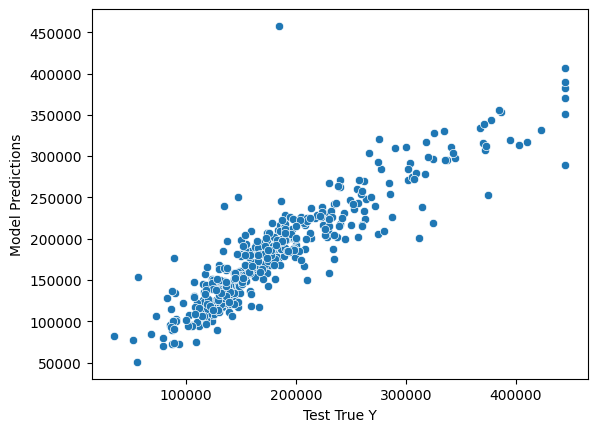

In [119]:
##lets plot the predictions to the original y values
sns.scatterplot(x='Test True Y', y= 'Model Predictions',data=pred_df)

In [120]:
MAE = metrics.mean_absolute_error(y_test,test_predictions)

MSE = metrics.mean_squared_error(y_test,test_predictions)

RMSE = np.sqrt(MSE)

R2 = metrics.r2_score(y_test,test_predictions)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print(f'R^2: {R2}')

MAE: 21209.868844997058
MSE: 1049135644.550477
RMSE: 32390.363451966343
R^2: 0.8096468710329036


- We still see that the Linear regression model perfroms best at predicting the house prices with the lowest error, Although models can be fine tuned to perform better